In [8]:
!jupyter kernelspec list

Available kernels:
  c                   /home/codespace/.local/share/jupyter/kernels/c
  jupyter-c-kernel    /home/codespace/.local/share/jupyter/kernels/jupyter-c-kernel
  python3             /home/codespace/.local/share/jupyter/kernels/python3


In [ ]:
!pip install jupyter-c-kernel

In [6]:
!install_c_kernel --user

Installing IPython kernel spec
/home/codespace/.python/current/bin/install_c_kernel:32: DeprecationWarning: replace is ignored. Installing a kernelspec always replaces an existing installation
  KernelSpecManager().install_kernel_spec(td, 'c', user=user, replace=True, prefix=prefix)


In [7]:
!python -m ipykernel install --user --name jupyter-c-kernel --display-name "C"

Installed kernelspec jupyter-c-kernel in /home/codespace/.local/share/jupyter/kernels/jupyter-c-kernel


In [5]:
#include<stdio.h>
#include<stdlib.h>
#include<unistd.h>

int main(int argc, char **argv){
    printf("Hello World! \n");
    return 0;
}

Hello World! 


## What is Tree

A tree is a nonlinear data structure with hierarchical relationships between its elements without having any cycle, it is bascially reversed from a real life tree.

**Tree properties**
- Represent hierarchical data
- Each node has two components : data and a link to its sub category
- Base category and sub categores under it

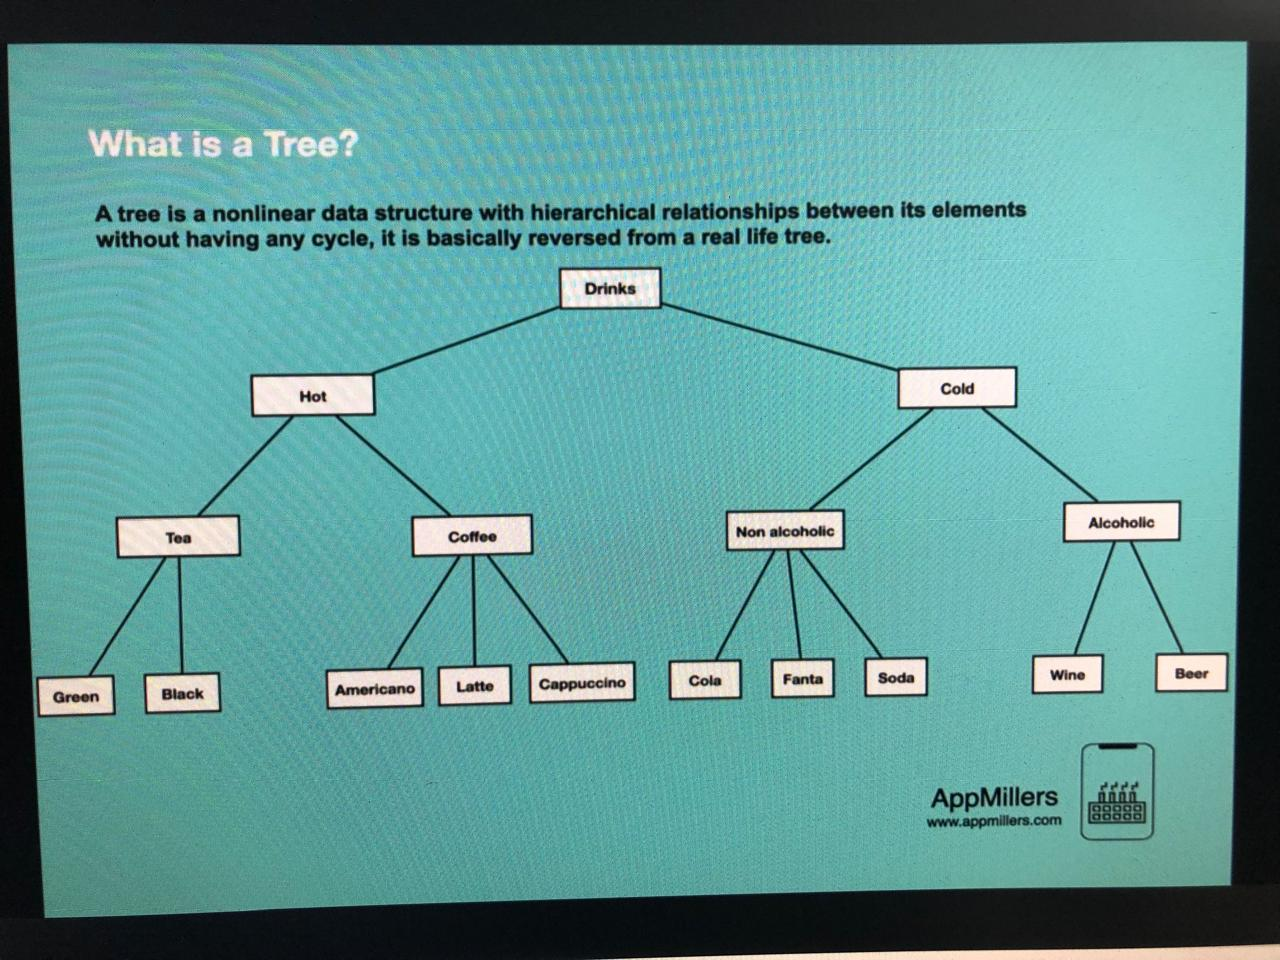

In [2]:
from IPython.display import Image
Image('images/Tree/what_is_tree.jpeg')

## Why Tree

- Quicker and Easier access to the data
- Store hierarchical data, like folder structure, organization structure, XML/HTML data
- There are many different types of data structures which performs better in various situations
    - Binary Search Tree, AVL, Red Black Tree, Trie

## Tree Terminology

- Root : top node without parent = N1
- Edge : a link between parent and child = line connects nodes
- Leaf : a node which does not have children = N5, N6, N7, N8
- Sibling : children of same parent = N4, N5
- Ancestor : parent, grandparent and great grandparent of a node = for N7 -> N4, N2, N1
- Depth of node(measured from Root) : A length of the path from root to node = Depth of N4 -> Root to Node -> N1-N2-N4 => 2
- Height of node(measured from last child) : A length of the path from the node to the deepest node = Height of N3 => 1
- Depth of tree : depth of root node = Depth of tree => 0(Always)
- Height of tree : height of root node = Deepest node in tree = here N7 = N1-1-N2-2-N4-3-N7 => 3 (number of edges/links)


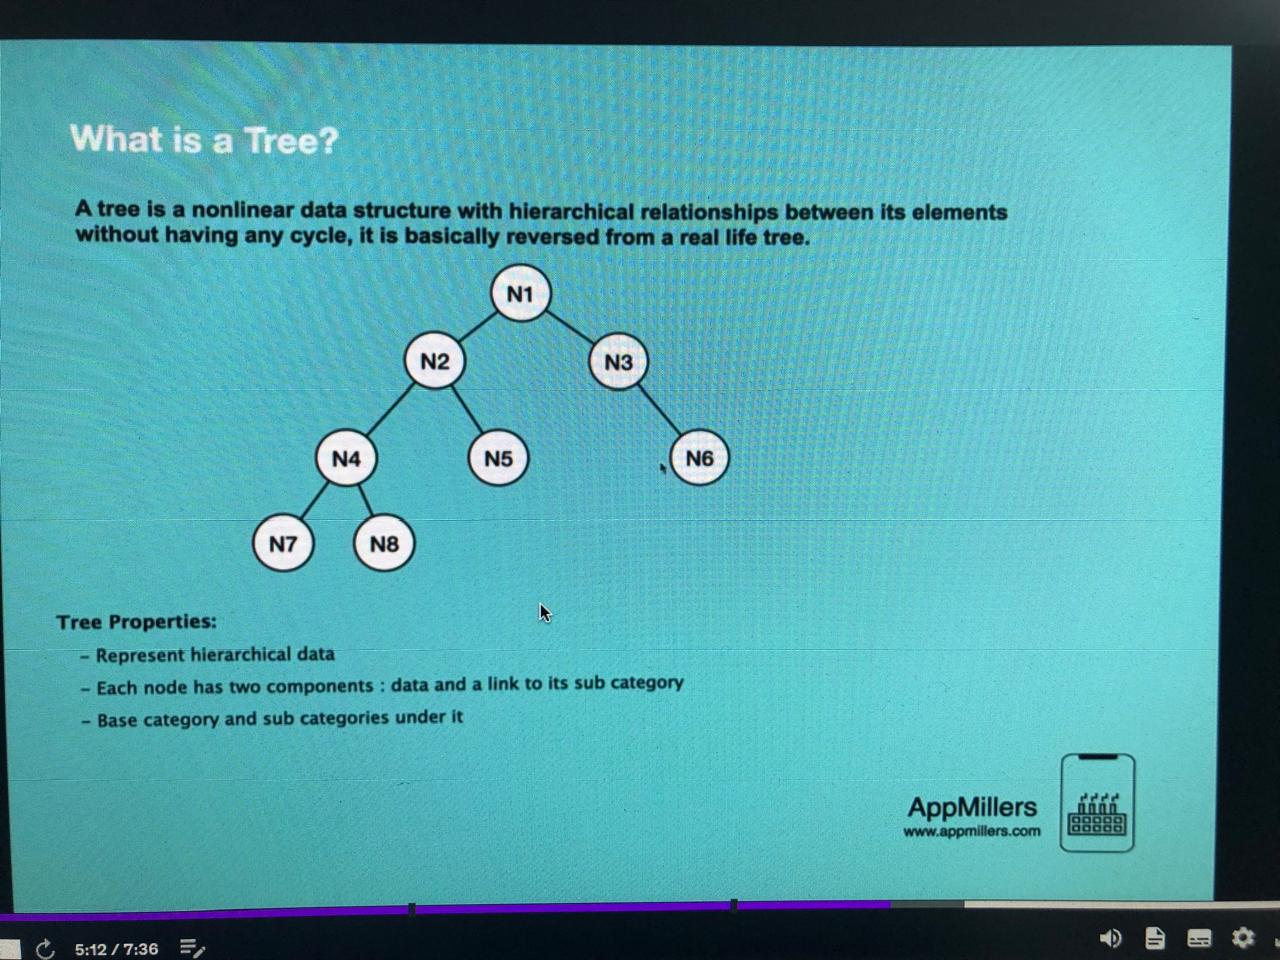

In [3]:
from IPython.display import Image
Image('images/Tree/tree_terminology.jpeg')

## How to create basic tree in Python?

In [33]:
class TreeNode:
    #The default parameter children=[] in init method can lead to unexpected behaviour. "Mutable default arguments" in Python are a
    #common source of bugs. Each instance of "TreeNode" without explicitly passed "children" will share the same list, which
    #can lead to children being shared across different tree nodes. It's usually safer to default to "None" and set children to a new 
    #list in the body of the method if it's None
    def __init__(self, data, children=[]) -> None:
        self.data = data
        self.children = children

    # self :: refers to the instance of the "TreeNode" object on which this method is called
    # level 0 :: param with default value of 0, used for keeping track of the tree depth in string representation
    def __str__(self, level=0) -> str:
        # "   " * level creates a string of spaces for indentation, where it is thrice the level value, helps for visual repr of tree
        ret = "   " * level + str(self.data) + "\n"
        #iterates over the children list of the current tree node
        #Recursive __str__ call :: for each child, the __str__ mehtod is called recursively (child.__str__(level+1))
        #level + 1 :: increases the indentation level for the child nodes
        #ret :: string repr of each child(including its own children, if any) is concatenated to the variable, basically multiline string
        for child in self.children:
            ret += child.__str__(level + 1)
        return ret
    
    def addChild(self, TreeNode):
        self.children.append(TreeNode)

In [29]:
tree = TreeNode("Drinks", [])
cold = TreeNode("Cold", [])
hot = TreeNode("Hot", [])

#child node for Root-Drinks
tree.addChild(cold)
tree.addChild(hot)

#child node for Node-Cold
tea = TreeNode("Tea", [])
coffee = TreeNode("Coffee", [])
hot.addChild(tea)
hot.addChild(coffee)

#child node for Node-Hot
cola = TreeNode("Cola", [])
fanta = TreeNode("Fanta", [])
cold.addChild(cola)
cold.addChild(fanta)

print(tree)

Drinks
   Cold
      Cola
      Fanta
   Hot
      Tea
      Coffee



## Binary Tree

- Binary tree are the data structures in which each node has at most 2 children, often referred to as the left and right children.
- Binary tree is a family of data structure(BST, Heap Tree, AVL, red black trees, Syntax tree)

**why Binary Tree**
- Binary trees are a prerequisite for more advanced trees like BST, AVL, Red Black Trees
- Huffman coding problem, heap priority problem and expression parsing problems can be solved efficiently using binary trees


#### Full/Strict Binary Tree
if each node of a binary tree has a either 0/2 children, but not 1 then this binary tree is full binary tree.
In nutshell All nodes have either 0 or 2 children

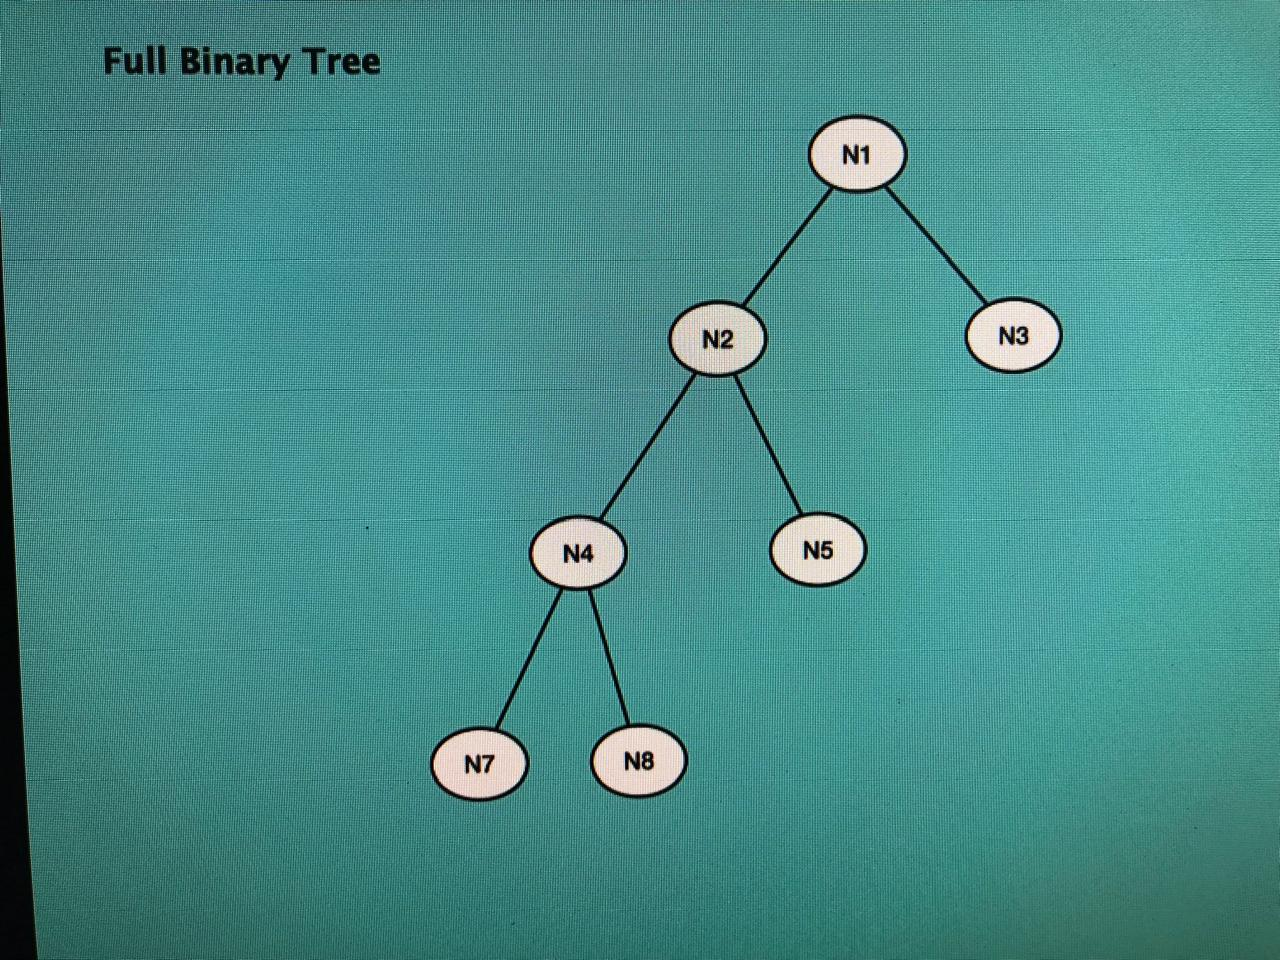

In [35]:
from IPython.display import Image
Image('images/Tree/full_binary_tree.jpeg')

In [34]:
tree = TreeNode("N1", [])
n2 = TreeNode("N2", [])
n3 = TreeNode("N3", [])
n4 = TreeNode("N4", [])
n5 = TreeNode("N5", [])
n6 = TreeNode("N6", [])
n7 = TreeNode("N7", [])
n8 = TreeNode("N8", [])

tree.addChild(n2)
tree.addChild(n3)

n2.addChild(n4)
n2.addChild(n5)

n4.addChild(n7)
n4.addChild(n8)

print(tree)

N1
   N2
      N4
         N7
         N8
      N5
   N3



#### Perfect Binary Tree
all non-leaf nodes have 2 children and they are at the same depth.
below all nodes in the same level and they have 2 children, and also all leaf nodes are located in the same level.

in nutshell - Internal nodes have 2 children + all leaf nodes are on same level

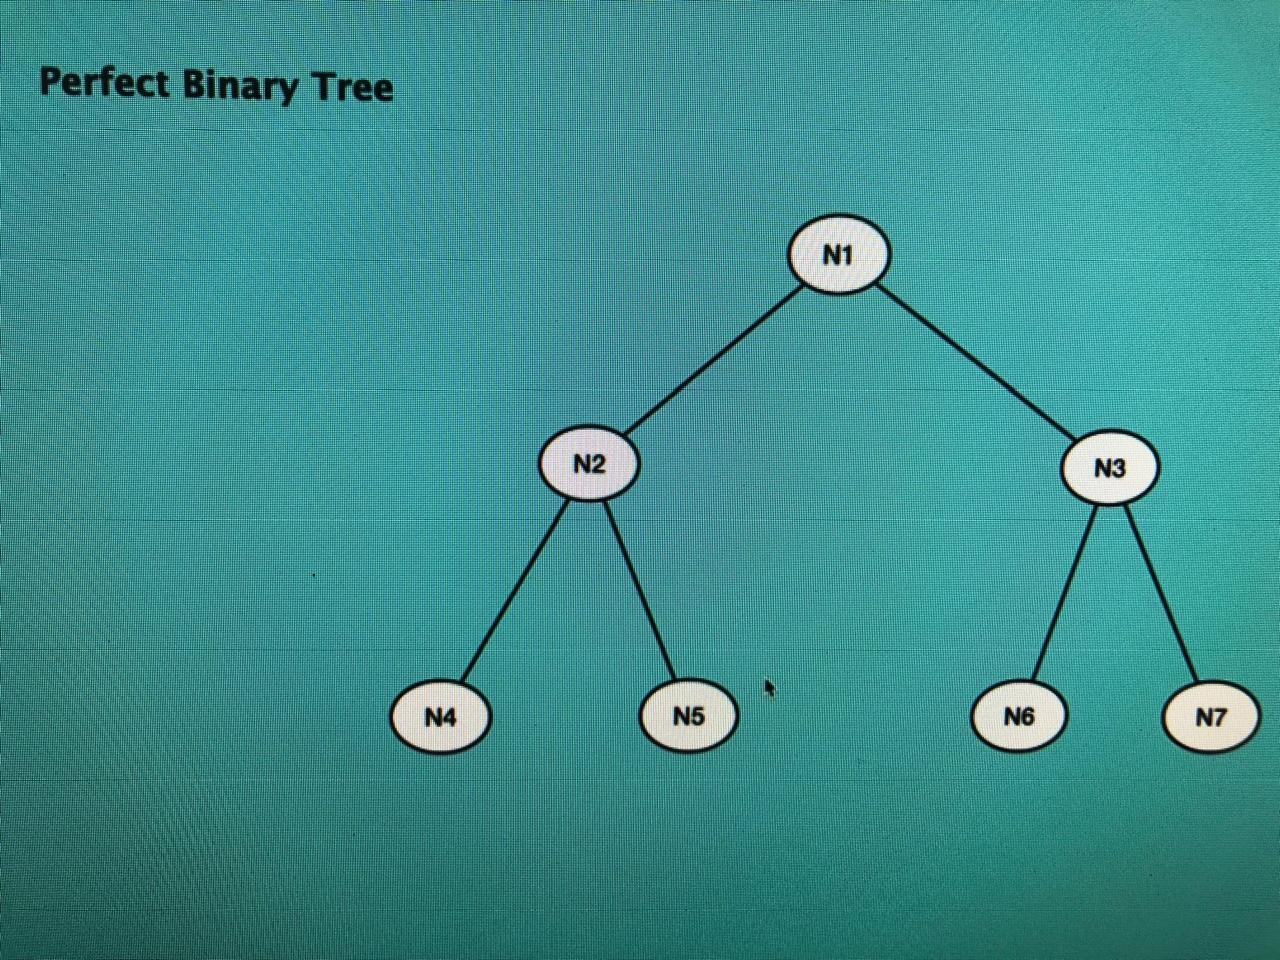

In [36]:
from IPython.display import Image
Image('images/Tree/perfect_binary_tree.jpeg')

#### Complete Binary Tree
In this case, all levels are completely filled except the last level. So the last level has all keys as left as possible.

as we can see, all levels over here are completely filled except the last one. In the last level here, we see that it's not completely fill. We have all nodes as left as possible in this case.  
If we have these nodes not under N4, it's under N5, then we can't call this tree "Complete Binary Tree"

in nutshell - All levels are completely filled except possibly the last level + last level must have it's keys as left as possible

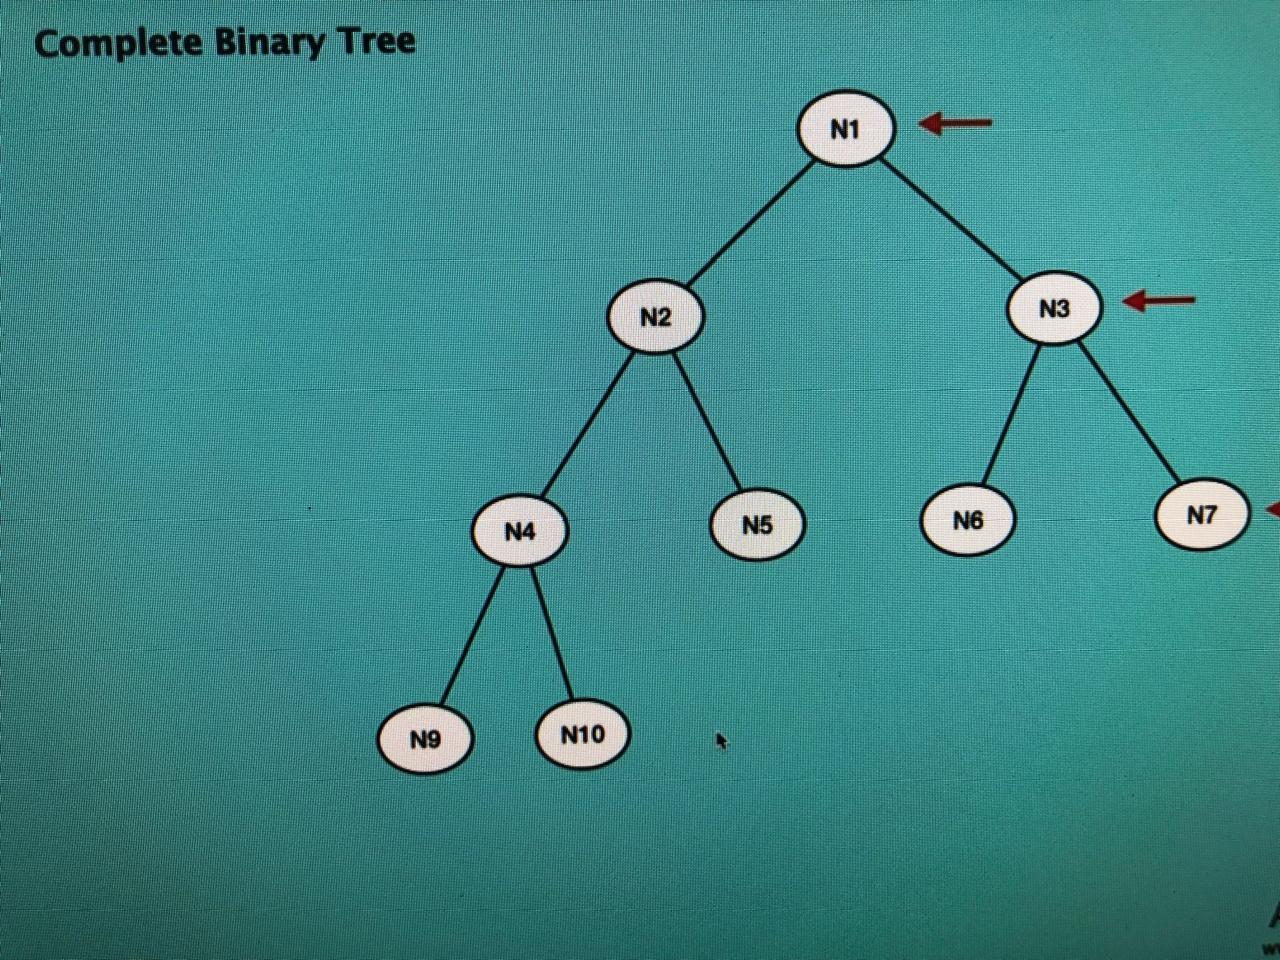

In [37]:
from IPython.display import Image
Image('images/Tree/complete_binary_tree.jpeg')

#### Balanced Binary Tree
in this case, each leaf is not more than a certain distance from the root node than any other leaf. Means that all leaf nodes are located from the root in the sam 

- from root - N4 depth =2
- from root - N5 depth =2
- from root - N7 depth =2

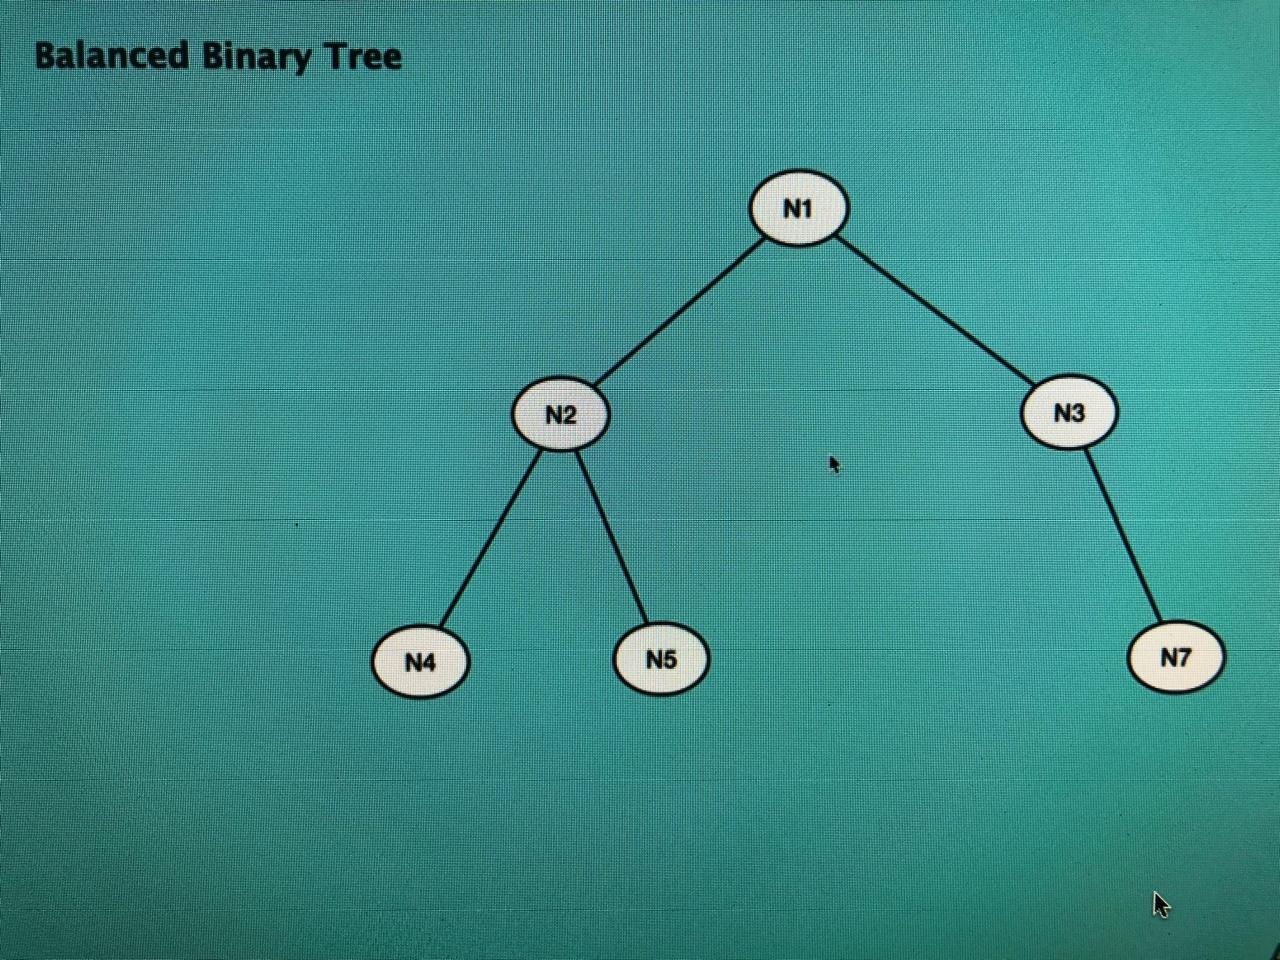

In [38]:
from IPython.display import Image
Image('images/Tree/balanced_binary_tree.jpeg')

#### Degenerate Tree - Every parent node has exactly one child
- Left Skewed
- Right Skewed

#### Binary Tree Representation

- Linked List
- List (python)
    - we won't use first cell, which has 0 index in list, basically we will set 0 index value=None in list
    - Left child = 2x     (x is parent node's index)     
    - Right child = 2x+1  (x is parent node's index)

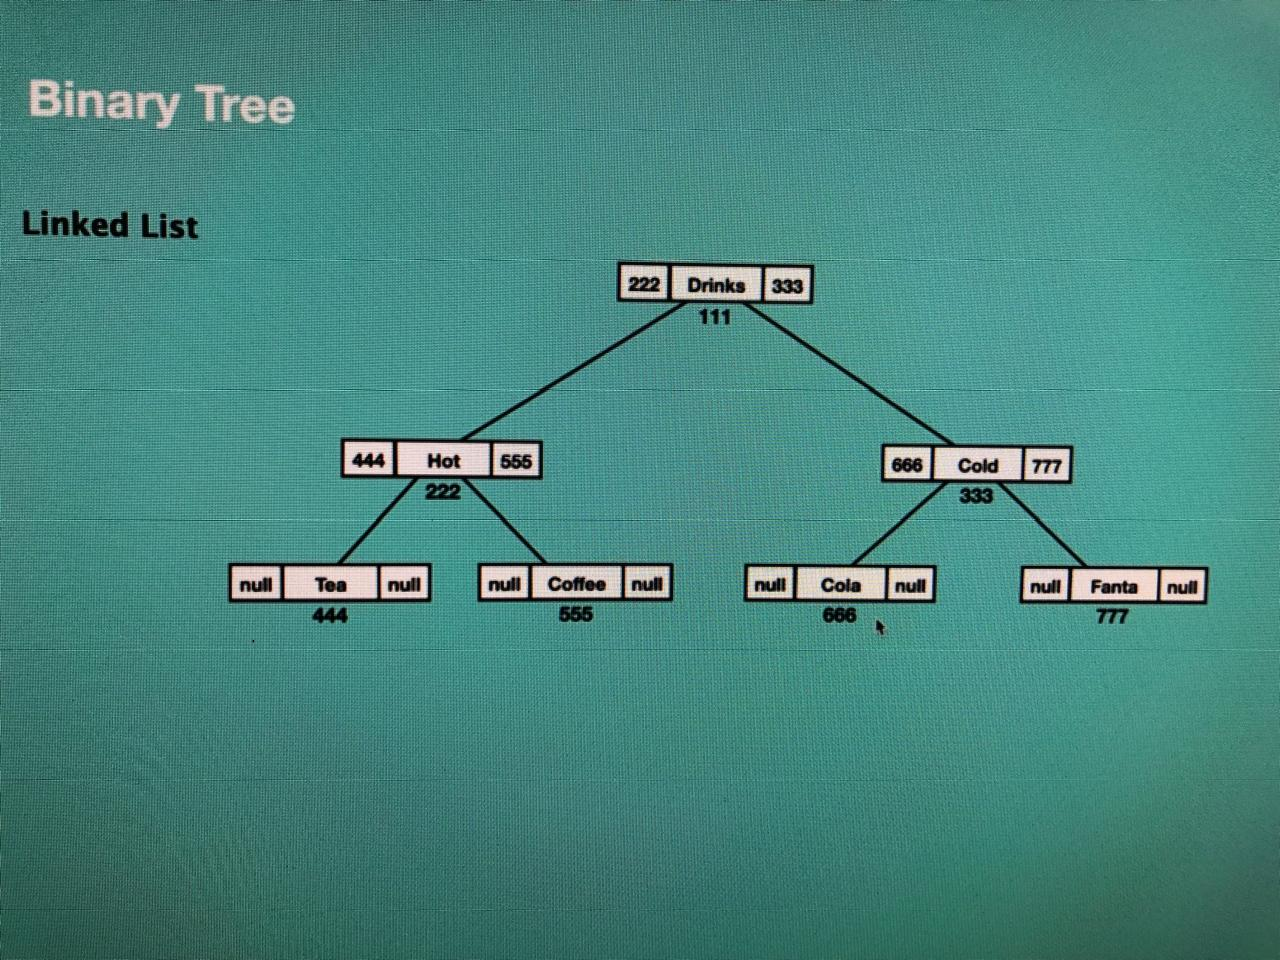

In [39]:
from IPython.display import Image
Image('images/Tree/linked_list_binary_tree.jpeg')

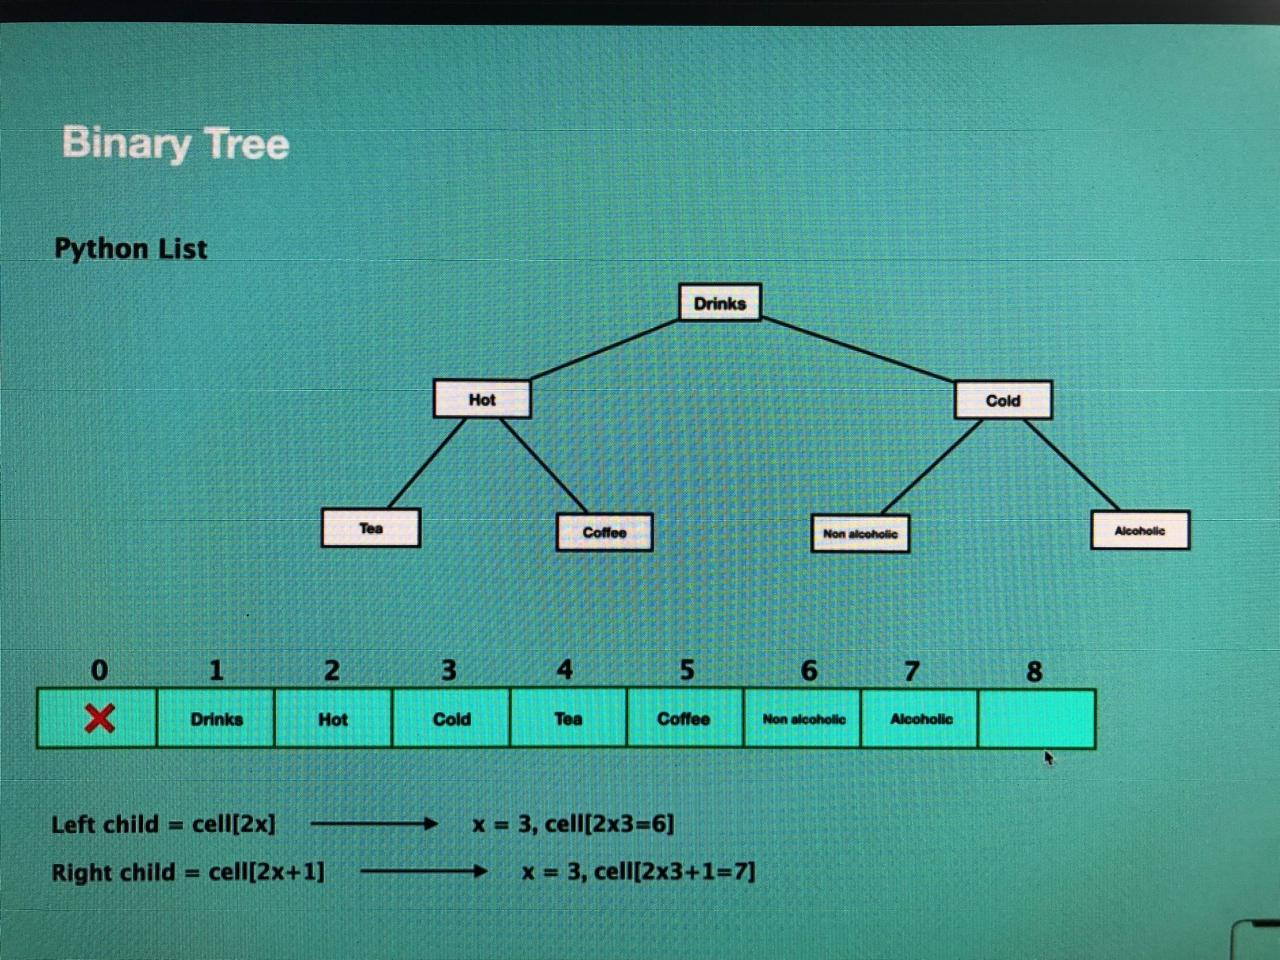

In [40]:
from IPython.display import Image
Image('images/Tree/python_list_binary_tree.jpeg')

- Root = "Drinks", index value = 1
- Root's child : 
    - Hot : 2x = (2 * index value of root node "Drinks") = 2*1 => 2 
        - Tea : 2x = 2 * index value of it's parent "Hot" = 2*2 => 4
        - Coffee : 2x+1 = 2 * index value of it's parent "Hot" + 1 = 2*2+1 => 5
    - Cold : 2x+1 = (2 * index value of root node "Drinks")+1 = 2*1+1 => 3 
        - Non alcoholic : 2x = 2 * index value of it's parent "Cold" = 2*3 => 6
        - Alcoholic : 2x = 2 * index value of it's parent "Cold" + 1 = 2*3+1 => 7

#### Create Binary Tree(Linked List)

- Creation of Tree
- Insertion of a node
- Deletion of a node
- Search for a value
- Traverse all nodes
- Deletion of tree

In [41]:
class TreeNode:
    def __init__(self, data) -> None:
        self.data = data
        self.leftChild = None
        self.rightChild = None

In [42]:
#Time & Space Complexity = O(1)
newBT = TreeNode("Drinks")

### Traversal of Binary Tree

- Depth first search (DFS)
    - Preorder traversal :: Root Node -> Left Subtree -> Right Subtree : N1 -> N2 -> N4 -> N9 -> N10 -> N5 -> N3 -> N6 -> N7
    - Inorder traversal :: Left Subtree -> Root Node -> Right Subtree :  N9 -> N4 -> N10 -> N2 -> N5 -> N1 -> N6 -> N3 -> N7
    - Post order traversal :: Left Subtree -> Right Subtree -> Root Node :  N9 -> N10 -> N4 -> N5 -> N2 -> N6 -> N7 -> N3 -> N1 (Always last visited node=Root Node)
- Breadth first search
    - Level order traversal :: Level1 -> Level2 -> Level3 -> Level4 : N1 -> N2 -> N3 -> N4 -> N5 -> N6 -> N7 -> N9 -> N10

#### PreOrder Traversal Binary Tree(Linked List)

- Root Node -> Left Subtree -> Right Subtree
- N1 -> N2 -> N4 -> N9 -> N10 -> N5 -> N3 -> N6 -> N7

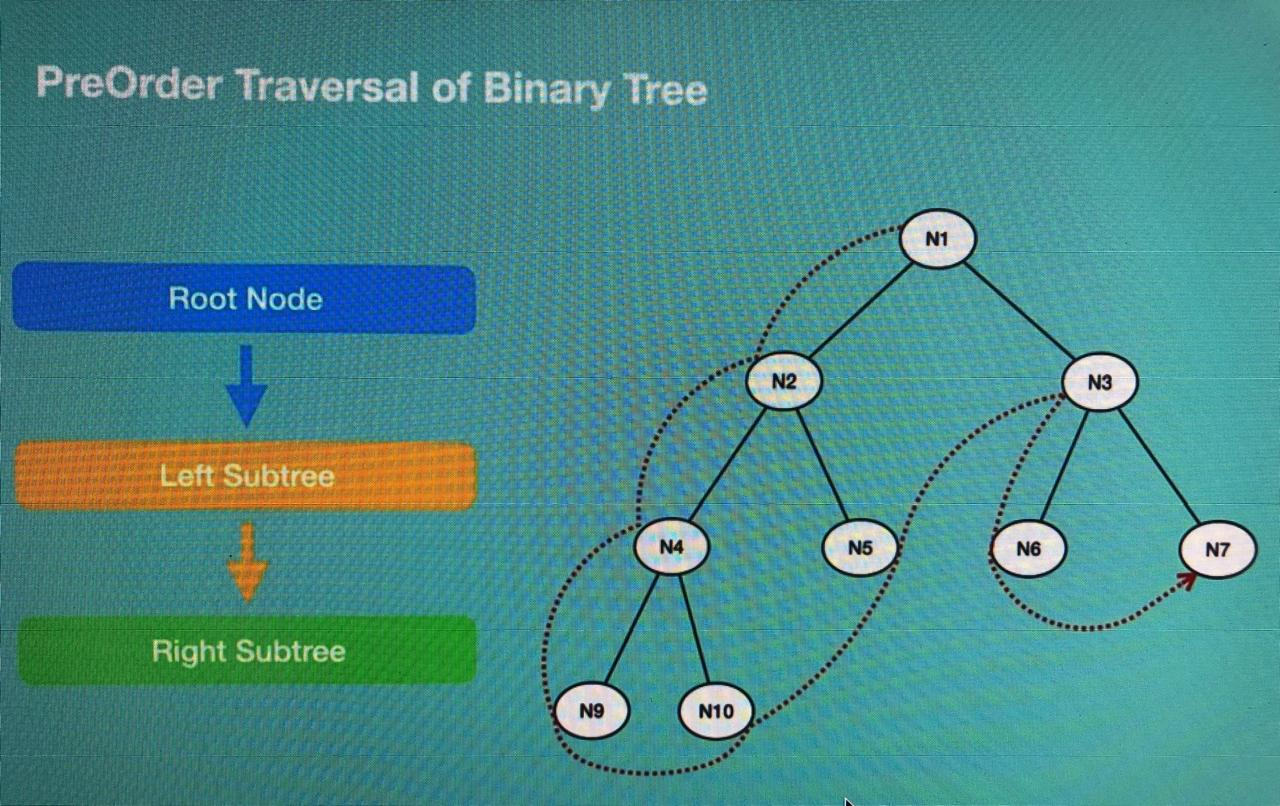

In [2]:
#Example Tree example to perform above traversal
from IPython.display import Image
Image("images/Tree/preorder_traversal.jpeg")

In [6]:
class TreeNode:
    def __init__(self, data) -> None:
        self.data = data
        self.leftChild = None
        self.rightChild = None

newBT = TreeNode("Drinks")
leftChild = TreeNode("Hot")
rightChild = TreeNode("Cold")

tea = TreeNode("Tea")
coffee = TreeNode("Coffee")
leftChild.leftChild = tea
leftChild.rightChild = coffee

blackTea = TreeNode("BlackTea")
greenTea = TreeNode("GreenTea")
tea.leftChild = blackTea
tea.rightChild = greenTea

espresso = TreeNode("Espresso")
coffee.leftChild = espresso

alcohalic = TreeNode("Alcohalic")
rightChild.leftChild = alcohalic

newBT.leftChild = leftChild
newBT.rightChild = rightChild

#Time Complexity = O(n)
#Space Complexity = O(n), coz we are using stack memory, when we call a function recursively, it inserts value to the stack memory
# So here by doing this, it can remember which step should be continued in the next section. So that's why in each step it inserts
# the node to the stack to come back to the that node after call of recursive function, then it comes back and continue from there.
def preOrderTraversal(rootNode):
    # Time Complexity = O(1)
    if not rootNode:
        return
    # Root Node
    # Time Complexity = O(1)
    print(rootNode.data)

    # Left Subtree
    # Time Complexity = O(n/2), coz for each node we have 2 children
    preOrderTraversal(rootNode.leftChild)

    # Right Subtree
    # Time Complexity = O(n/2), coz for each node we have 2 children
    preOrderTraversal(rootNode.rightChild)

preOrderTraversal(newBT)

Drinks
Hot
Tea
BlackTea
GreenTea
Coffee
Espresso
Cold
Alcohalic


#### InOrder Traversal Binary Tree(Linked List)
- Left Subtree -> Root Node -> Right Subtree
- N9 -> N4 -> N10 -> N2 -> N5 -> N1 -> N6 -> N3 -> N7

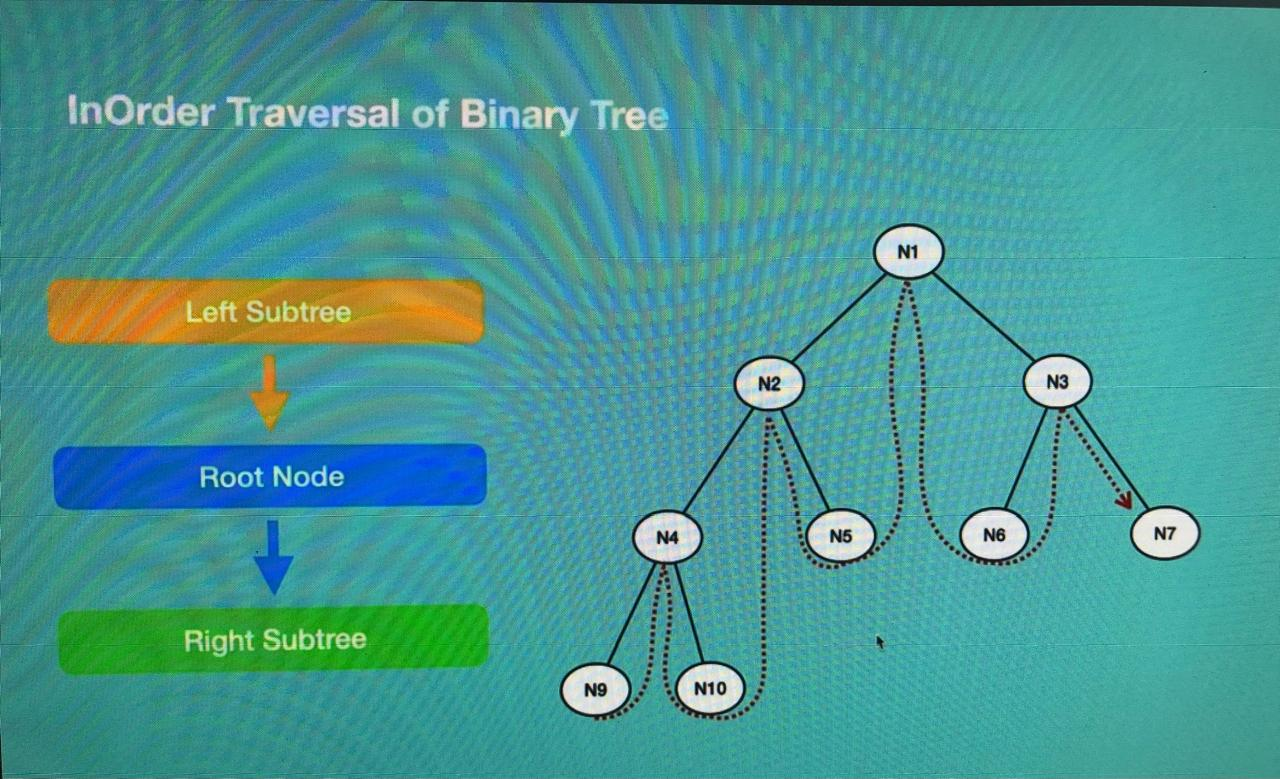

In [7]:
#Example Tree example to perform above traversal
from IPython.display import Image
Image("images/Tree/inOrder_traversal.jpeg")

In [8]:
class TreeNode:
    def __init__(self, data) -> None:
        self.data = data
        self.leftChild = None
        self.rightChild = None

newBT = TreeNode("Drinks")
leftChild = TreeNode("Hot")
rightChild = TreeNode("Cold")

tea = TreeNode("Tea")
coffee = TreeNode("Coffee")
leftChild.leftChild = tea
leftChild.rightChild = coffee

blackTea = TreeNode("BlackTea")
greenTea = TreeNode("GreenTea")
tea.leftChild = blackTea
tea.rightChild = greenTea

espresso = TreeNode("Espresso")
coffee.leftChild = espresso

alcohalic = TreeNode("Alcohalic")
rightChild.leftChild = alcohalic

newBT.leftChild = leftChild
newBT.rightChild = rightChild

#Time Complexity = O(n)
#Space Complexity = O(n)
def inOrderTraversal(rootNode):
    # Time Complexity = O(1)
    if not rootNode:
        return
    
    #Left Subtree 
    #Time Complexity = O(n/2), coz for each node we have 2 children
    inOrderTraversal(rootNode.leftChild)    

    #Root Node
    # Time Complexity = O(1)
    print(rootNode.data)

    #Left Subtree
    # Time Complexity = O(n/2), coz for each node we have 2 children
    inOrderTraversal(rootNode.rightChild)

inOrderTraversal(newBT)

BlackTea
Tea
GreenTea
Hot
Espresso
Coffee
Drinks
Alcohalic
Cold


#### PostOrder Traversal Binary Tree(LinkedList)
- Left Subtree -> Right Subtree -> Root Node
- N9 -> N10 -> N4 -> N5 -> N2 -> N6 -> N7 -> N3 -> N1 (Always last visited node=Root Node)

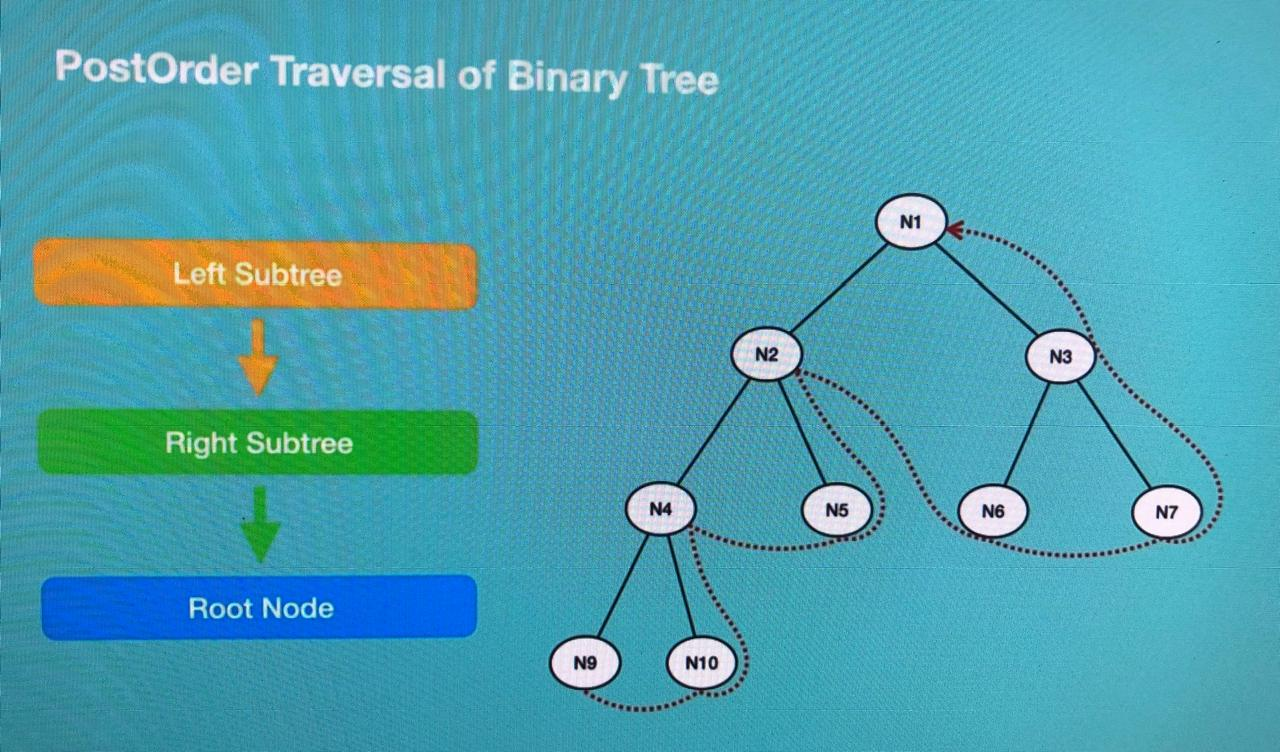

In [9]:
from IPython.display import Image
Image("images/Tree/PostOrder_traversal.jpeg")

In [12]:
class TreeNode:
    def __init__(self, data) -> None:
        self.data = data
        self.leftChild = None
        self.rightChild = None

newBT = TreeNode("Drinks")
leftChild = TreeNode("Hot")
rightChild = TreeNode("Cold")

tea = TreeNode("Tea")
coffee = TreeNode("Coffee")
leftChild.leftChild = tea
leftChild.rightChild = coffee

blackTea = TreeNode("BlackTea")
greenTea = TreeNode("GreenTea")
tea.leftChild = blackTea
tea.rightChild = greenTea

espresso = TreeNode("Espresso")
coffee.leftChild = espresso

alcohalic = TreeNode("Alcohalic")
rightChild.leftChild = alcohalic

newBT.leftChild = leftChild
newBT.rightChild = rightChild

#Time Complexity = O(n)
#Space Complexity = O(n)
def postOrderTraversal(rootNode):
    # Time Complexity = O(1)
    if not rootNode:
        return
    
    #Left Subtree 
    #Time Complexity = O(n/2), coz for each node we have 2 children
    postOrderTraversal(rootNode.leftChild)    

    #Left Subtree
    # Time Complexity = O(n/2), coz for each node we have 2 children
    postOrderTraversal(rootNode.rightChild)

    #Root Node
    # Time Complexity = O(1)
    print(rootNode.data)

postOrderTraversal(newBT)

BlackTea
GreenTea
Tea
Espresso
Coffee
Hot
Alcohalic
Cold
Drinks


#### Level order traversal of Binary Tree
- Level1 -> Level2 -> Level3 -> Level4
- N1 -> N2 -> N3 -> N4 -> N5 -> N6 -> N7 -> N9 -> N10

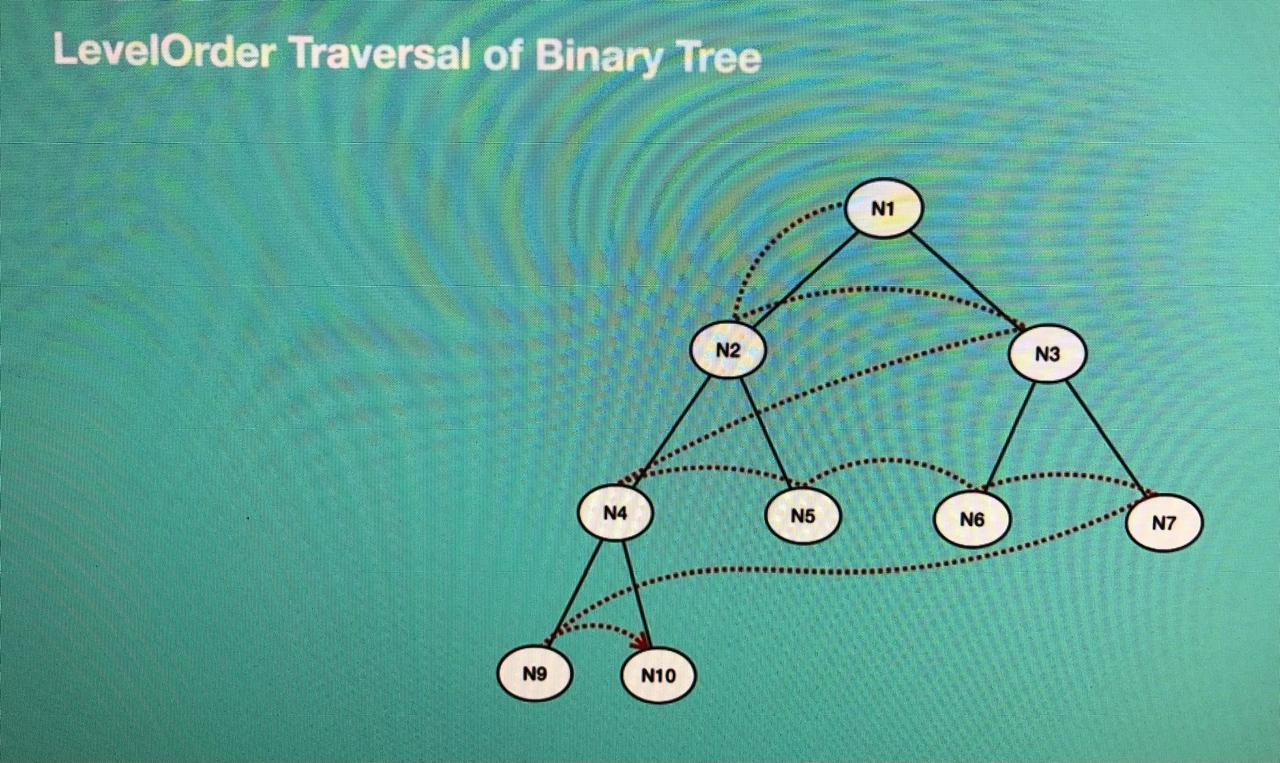

In [11]:
from IPython.display import Image
Image("images/Tree/levelOrderTraversal.jpeg")

In [13]:
class Node:
    def __init__(self, value=None) -> None:
        self.value = value
        self.next = None

    def __str__(self) -> str:
        return str(self.value)
    
class LinkedList:
    def __init__(self) -> None:
        self.head = None
        self.tail = None

    #will just make this linked list iterable, coz we will print out the queue over here.
    #Basically se iterating through the linked list and yielding the values of nodes in one list. 
    #By using this function we can make our linked list iterable
    def __iter__(self):
        currentNode = self.head
        while currentNode:
            yield currentNode
            currentNode = currentNode.next

class Queue:
    #Time & Space Complexity :: O(1)
    def __init__(self) -> None:
        #so by calling the object of this linked list we are doing it over here and head&tail ref to None
        self.linkedList = LinkedList()

    def __str__(self) -> str:
        values = [str(x) for x in self.linkedList]
        return ' '.join(values)
    
    #Time & Space Complexity :: O(1)
    def enqueue(self, value):
        newNode = Node(value)
        if self.linkedList.head == None:
            self.linkedList.head = newNode
            self.linkedList.tail = newNode
        else:
            self.linkedList.tail.next = newNode
            self.linkedList.tail = newNode

    #Time & Space Complexity :: O(1)
    def isEmpty(self):
        if self.linkedList.head == None:
            return True
        else:
            return False

    #Time & Space Complexity :: O(1)
    def dequeue(self):
        if self.isEmpty():
            return "There is not any node in the Queue"
        else:
            tmpNode = self.linkedList.head
            if self.linkedList.head == self.linkedList.tail:
                self.linkedList.head = None
                self.linkedList.tail = None
            else:
                self.linkedList.head = self.linkedList.head.next
            return tmpNode
        
    #Time & Space Complexity :: O(1)
    def peek(self):
        if self.isEmpty():
            return "There is not any node in the Queue"
        else:
            return self.linkedList.head

    #Time & Space Complexity :: O(1)
    def delete(self):
        self.linkedList.head = None
        self.linkedList.tail = None

In [19]:
class TreeNode:
    def __init__(self, data) -> None:
        self.data = data
        self.leftChild = None
        self.rightChild = None

newBT = TreeNode("Drinks")
leftChild = TreeNode("Hot")
rightChild = TreeNode("Cold")

newBT.leftChild = leftChild
newBT.rightChild = rightChild

tea = TreeNode("Tea")
coffee = TreeNode("Coffee")
leftChild.leftChild = tea
leftChild.rightChild = coffee

blackTea = TreeNode("BlackTea")
greenTea = TreeNode("GreenTea")
tea.leftChild = blackTea
tea.rightChild = greenTea

espresso = TreeNode("Espresso")
coffee.leftChild = espresso

alcohalic = TreeNode("Alcohalic")
rightChild.leftChild = alcohalic


#Time Complexity = O(n)
#Space Complexity = O(n)
def levelOrderTraversal(rootNode):
    # Time Complexity = O(1)
    if not rootNode:
        return
    else:
        # Time Complexity = O(1), coz just creating object
        customQ = Queue()
        # Time Complexity = O(1)
        customQ.enqueue(rootNode)
        # Time complexity = O(n)
        while not(customQ.isEmpty()):
            root = customQ.dequeue()
            #So in the queue class, as you see for each node, we have a value. So we need to access the value then inside value we have node.
            print(root.value.data)

            if(root.value.leftChild is not None):
                customQ.enqueue(root.value.leftChild)

            if(root.value.rightChild is not None):
                customQ.enqueue(root.value.rightChild)                

levelOrderTraversal(newBT)

Drinks
Hot
Cold
Tea
Coffee
Alcohalic
BlackTea
GreenTea
Espresso


#### Searching for a node in Binary Tree(Linked List)

In [16]:
# Time Complexity = O(n)
# Space Complexity = O(n)
def searchBT(rootNode, nodeValue):
    if not rootNode:
        return "The Binary Tree doesn't exist"
    else:
        customQ = Queue()
        customQ.enqueue(rootNode)
        while not (customQ.isEmpty()):
            root = customQ.dequeue()
            if root.value.data == nodeValue:
                return "Success"
            
            if root.value.leftChild is not None:
                customQ.enqueue(root.value.leftChild)

            if root.value.rightChild is not None:
                customQ.enqueue(root.value.rightChild)  

        return "Not Found"         

In [20]:
class TreeNode:
    def __init__(self, data) -> None:
        self.data = data
        self.leftChild = None
        self.rightChild = None

newBT = TreeNode("Drinks")
leftChild = TreeNode("Hot")
rightChild = TreeNode("Cold")

newBT.leftChild = leftChild
newBT.rightChild = rightChild

tea = TreeNode("Tea")
coffee = TreeNode("Coffee")
leftChild.leftChild = tea
leftChild.rightChild = coffee

blackTea = TreeNode("BlackTea")
greenTea = TreeNode("GreenTea")
tea.leftChild = blackTea
tea.rightChild = greenTea

espresso = TreeNode("Espresso")
coffee.leftChild = espresso

alcohalic = TreeNode("Alcohalic")
rightChild.leftChild = alcohalic

In [22]:
print(searchBT(newBT, "BlackTea"))

Success


In [23]:
print(searchBT(newBT, "Pepsi"))

Not Found
